In [ ]:
#1.1 Загрузка и визуализация временного ряда
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import seaborn
seaborn.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
%matplotlib inline

In [ ]:
factors = pdr.get_data_famafrench(
    "F-F_Research_Data_Factors", start="1-1-1926")[0]
factors.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.56,-2.43,0.22
1926-08,2.64,-1.17,3.82,0.25
1926-09,0.36,-1.40,0.13,0.23
1926-10,-3.24,-0.09,0.70,0.32
1926-11,2.53,-0.10,-0.51,0.31


In [ ]:
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS


In [ ]:
industries = pdr.get_data_famafrench(
    "10_Industry_Portfolios", start="1-1-1926")[0]
industries.head()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
1926-07,1.45,15.55,4.69,-1.18,2.90,0.83,0.11,1.77,7.04,2.13
1926-08,3.97,3.68,2.81,3.47,2.66,2.17,-0.71,4.25,-1.69,4.35
1926-09,1.14,4.80,1.15,-3.39,-0.38,2.41,0.21,0.69,2.04,0.29
1926-10,-1.24,-8.23,-3.63,-0.78,-4.58,-0.11,-2.29,-0.57,-2.63,-2.84
1926-11,5.20,-0.19,4.10,0.01,4.71,1.63,6.43,5.42,3.71,2.11


In [ ]:
endog = industries.HiTec - factors.RF.values
exog = sm.add_constant(factors["Mkt-RF"])
rols = RollingOLS(endog, exog, window=60)
rres = rols.fit()
params = rres.params.copy()
params.index = np.arange(1, params.shape[0] + 1)
params.head()

,const,Mkt-RF
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN


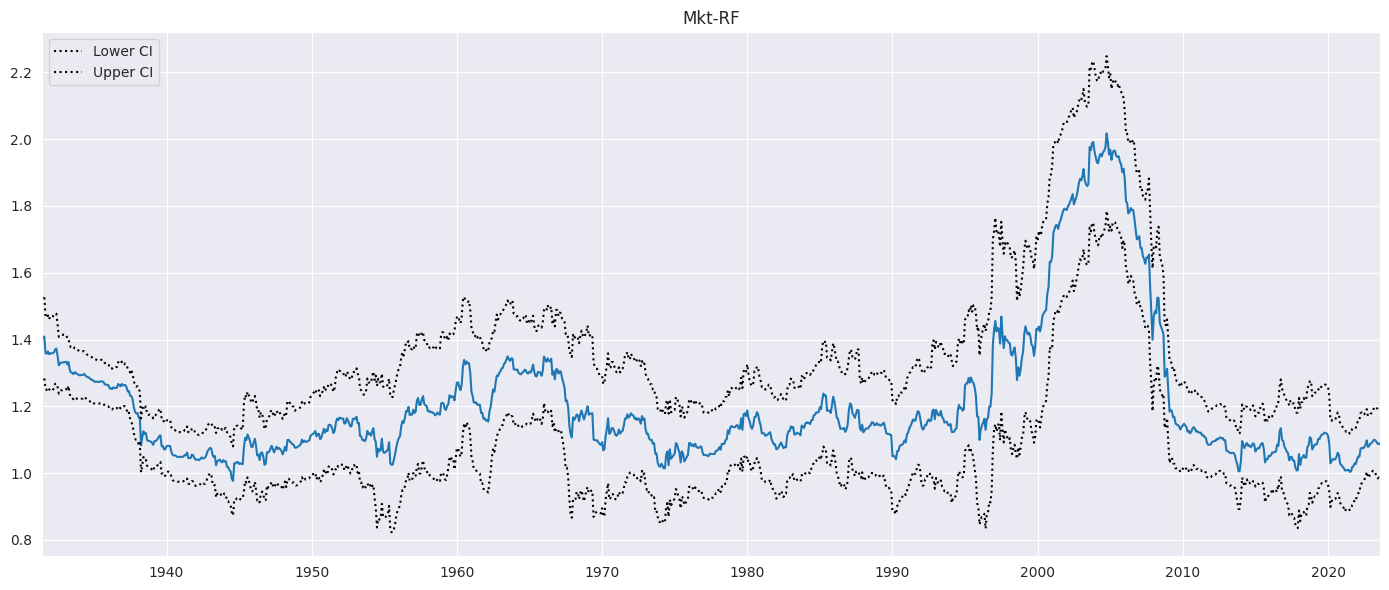

In [ ]:
fig = rres.plot_recursive_coefficient(
    variables=["Mkt-RF"], figsize=(14, 6))

In [17]:
#1.2 Компонентный анализ для визуализации с PCA
cc_behavior = pd.read_csv('CC GENERAL.csv')
cc_behavior.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [18]:
cc_behavior.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [19]:
cc_behavior.isnull().sum().sort_values(ascending=False).head()


MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
CUST_ID               0
BALANCE               0
PRC_FULL_PAYMENT      0
dtype: int64

In [22]:
cc_behavior.loc[
     (cc_behavior['MINIMUM_PAYMENTS'].isnull()==True),
     'MINIMUM_PAYMENTS']=cc_behavior['MINIMUM_PAYMENTS'].mean()
cc_behavior.loc[
     (cc_behavior['CREDIT_LIMIT'].isnull()==True),
     'CREDIT_LIMIT']=cc_behavior['CREDIT_LIMIT'].mean()

In [23]:
cc_behavior.isnull().sum().sort_values(ascending=False).head()


CUST_ID             0
BALANCE             0
PRC_FULL_PAYMENT    0
MINIMUM_PAYMENTS    0
PAYMENTS            0
dtype: int64

In [25]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES',
         'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
         'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
for c in columns:
    Range=c+'_RANGE'
    cc_behavior[Range]=0
    cc_behavior.loc[
    ((cc_behavior[c]>0)&(cc_behavior[c]<=500)), Range]=1
    cc_behavior.loc[
    ((cc_behavior[c]>500)&(cc_behavior[c]<=1000)), Range]=2
    cc_behavior.loc[
    ((cc_behavior[c]>1000)&(cc_behavior[c]<=3000)), Range]=3
    cc_behavior.loc[
    ((cc_behavior [c]>3000)&(cc_behavior[c]<=5000)), Range]=4
    cc_behavior.loc[
    ((cc_behavior [c]>5000)&(cc_behavior[c]<=10000)), Range]=5
    cc_behavior.loc[((cc_behavior[c]>10000)),Range]=6


In [26]:
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY',
         'ONEOFF_PURCHASES_FREQUENCY',
         'PURCHASES_INSTALLMENTS_FREQUENCY',
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']
for c in columns:
  Range=c+'_RANGE'
  cc_behavior[Range]=0
  cc_behavior.loc[
  ((cc_behavior[c]>0)&(cc_behavior[c]<=0.1)),Range]=1
  cc_behavior.loc[
  ((cc_behavior[c]>0.1)&(cc_behavior[c]<=0.2)),Range]=2
  cc_behavior.loc[
  ((cc_behavior[c]>0.2)&(cc_behavior[c]<=0.3)),Range]=3
  cc_behavior.loc[
  ((cc_behavior[c]>0.3)&(cc_behavior[c]<=0.4)),Range]=4
  cc_behavior.loc[
  ((cc_behavior[c]>0.4)&(cc_behavior[c]<=0.5)),Range]=5
  cc_behavior.loc[
  ((cc_behavior[c]>0.5)&(cc_behavior[c]<=0.6)),Range]=6
  cc_behavior.loc[
  ((cc_behavior[c]>0.6)&(cc_behavior[c]<=0.7)),Range]=7
  cc_behavior.loc[
  ((cc_behavior[c]>0.7)&(cc_behavior[c]<=0.8)),Range]=8
  cc_behavior.loc[
  ((cc_behavior[c]>0.8)&(cc_behavior[c]<=0.9)),Range]=9
  cc_behavior.loc[
  ((cc_behavior[c]>0.9)&(cc_behavior[c]<=1.0)),Range]=10

In [27]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']

for c in columns:

  Range=c+'_RANGE'
  cc_behavior[Range]=0
  cc_behavior.loc[
      ((cc_behavior[c]>0)&(cc_behavior[c]<=5)),Range]=1
  cc_behavior.loc[
     ((cc_behavior[c]>5)&(cc_behavior[c]<=10)),Range]=2
  cc_behavior.loc[
     ((cc_behavior[c]>10)&(cc_behavior[c]<=15)),Range]=3
  cc_behavior.loc[
     ((cc_behavior[c]>15)&(cc_behavior[c]<=20)),Range]=4
  cc_behavior.loc[
    ((cc_behavior[c]>20)&(cc_behavior[c]<=30)),Range]=5
  cc_behavior.loc[
     ((cc_behavior[c]>30)&(cc_behavior[c]<=50)),Range]=6
  cc_behavior.loc[
     ((cc_behavior[c]>50)&(cc_behavior[c]<=100)),Range]=7
  cc_behavior.loc[((cc_behavior[c]>100)),Range]=8


In [28]:
cc_behavior.drop([
 'CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY',
 'PURCHASES', 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT'], axis=1, inplace=True)
X = np.asarray(cc_behavior)


In [29]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)
X.shape

(8950, 17)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

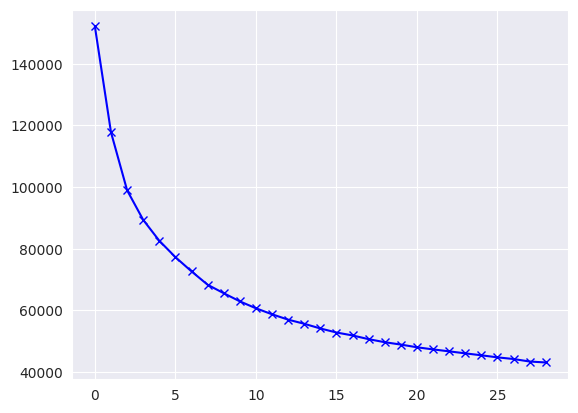

In [30]:
from sklearn.cluster import KMeans
n_clusters=30
cost=[]
for i in range(1,n_clusters):
 kmean= KMeans(i)
 kmean.fit(X)
 cost.append(kmean.inertia_)
plt.plot(cost, 'bx-')

In [31]:
Kmean = KMeans(6)
kmean.fit(X)
labels = kmean.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
clusters=pd.concat([
 cc_behavior,
 pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,cluster
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0,1
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1,17
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0,24
3,12,3,3,3,0,1,5,0,2,7,1,1,0,1,0,1,1,4
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0,28


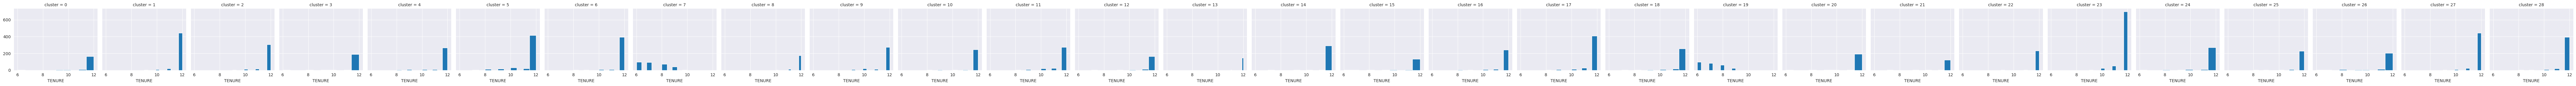

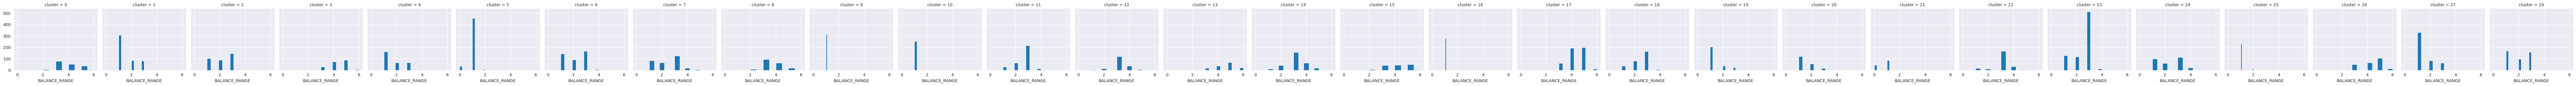

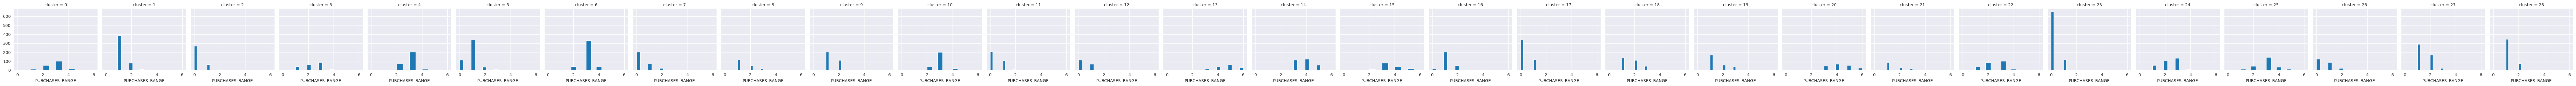

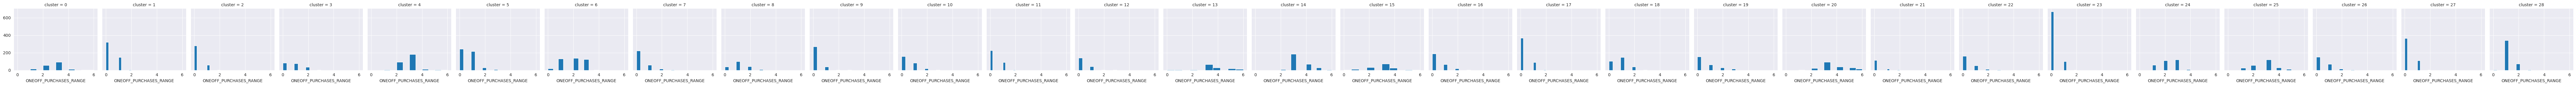

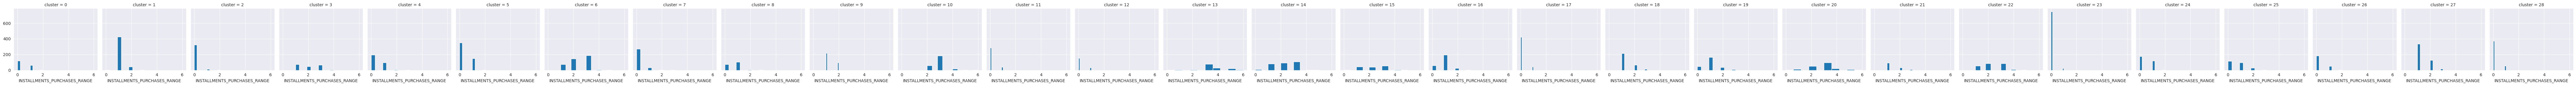

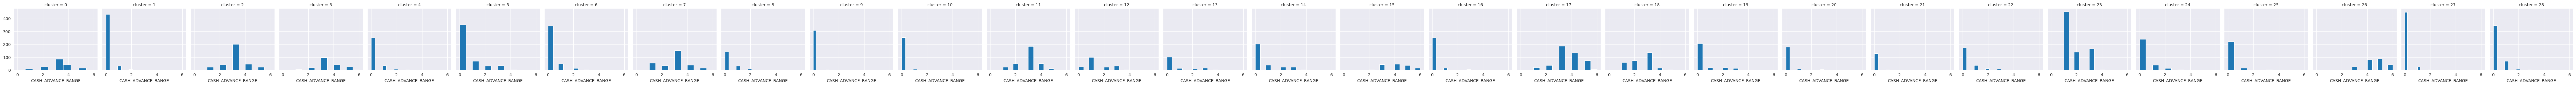

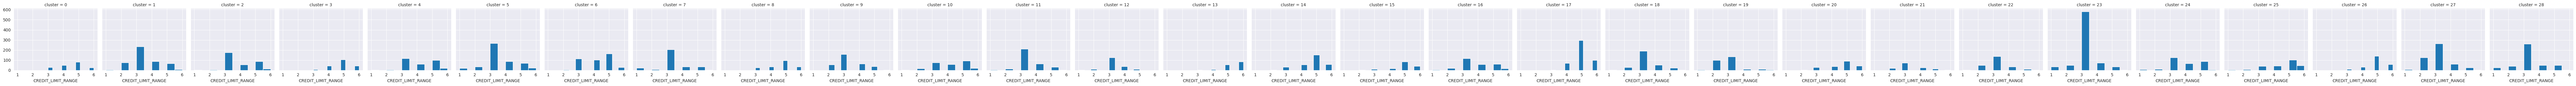

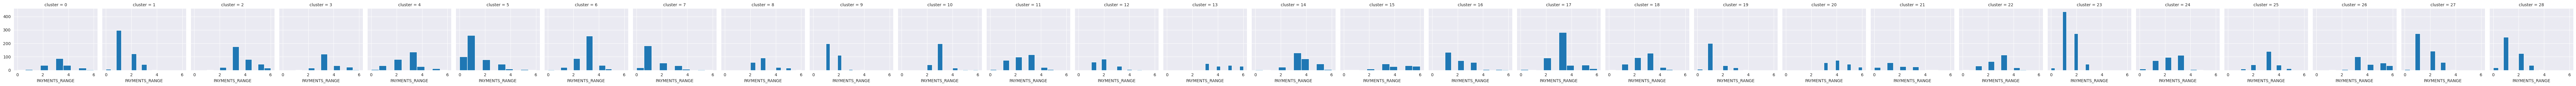

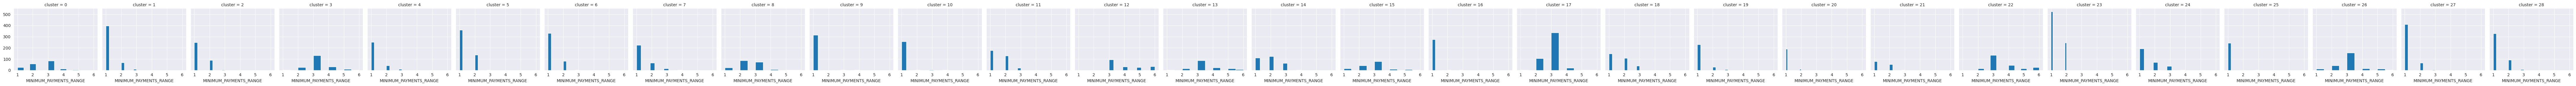

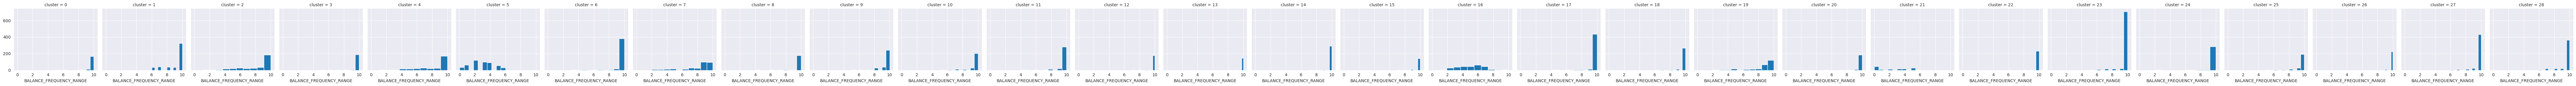

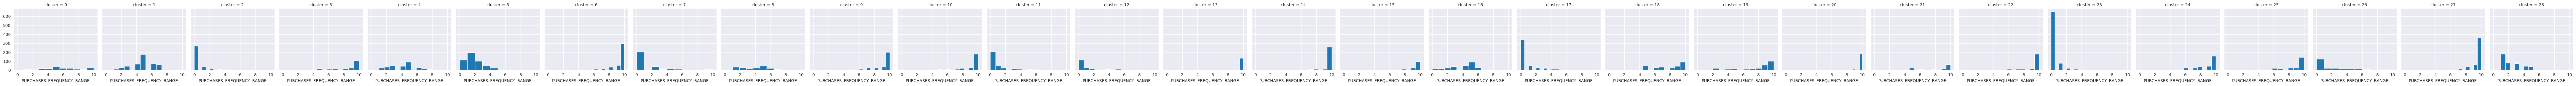

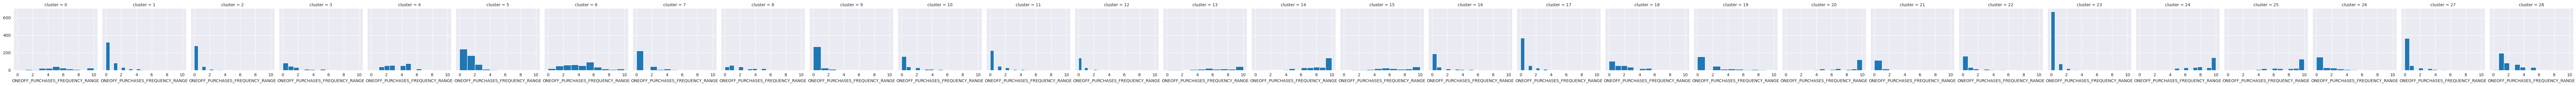

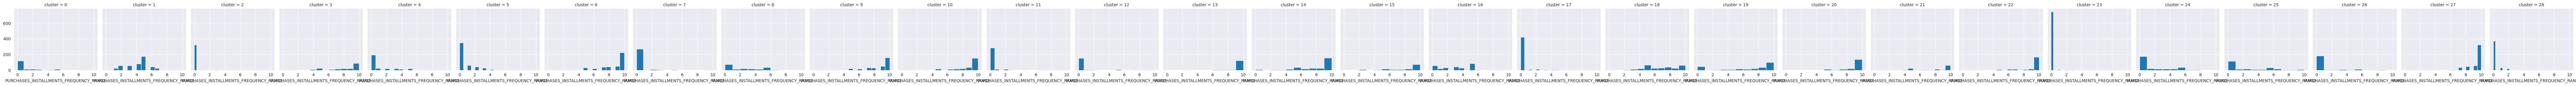

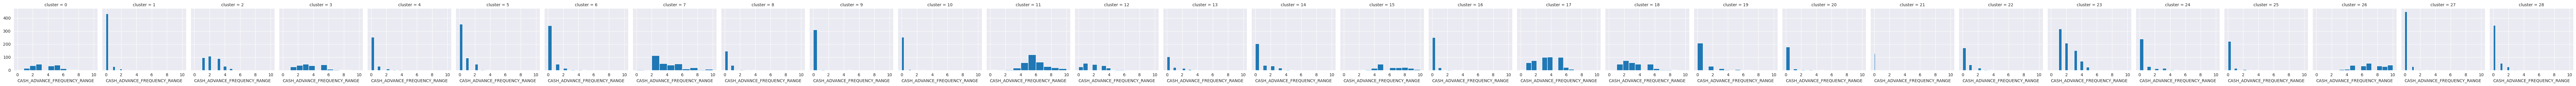

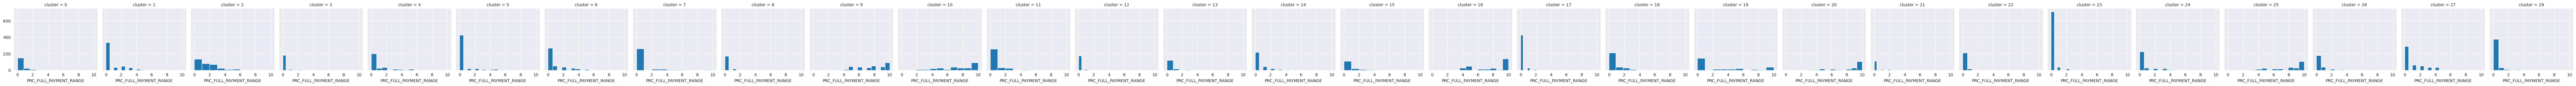

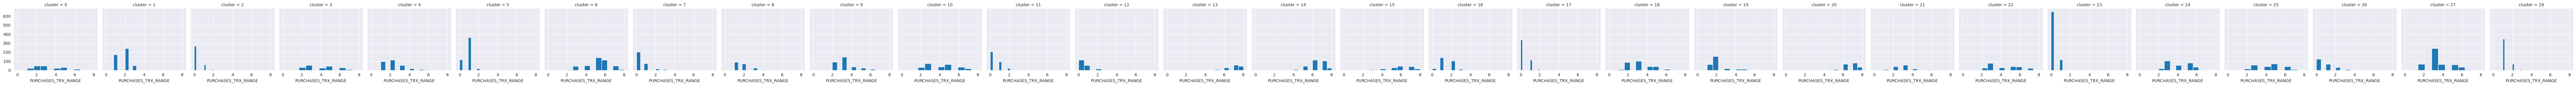

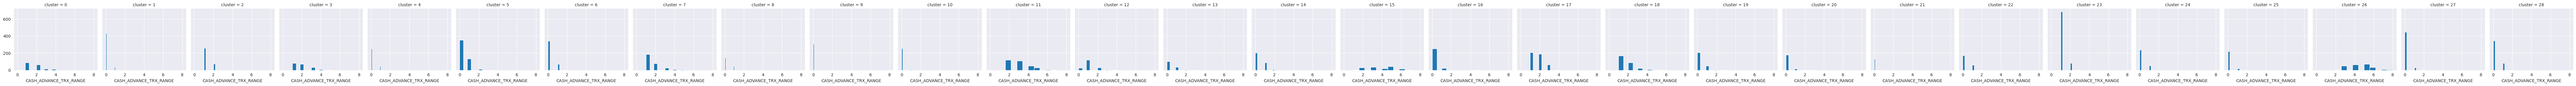

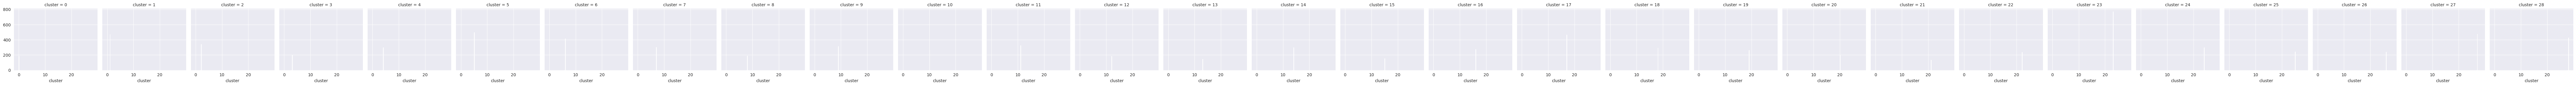

In [33]:
import seaborn as sns
for c in clusters:
 grid = sns.FacetGrid(clusters, col='cluster')
 grid.map(plt.hist, c)

In [36]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)
pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 2)

KeyError: ignored

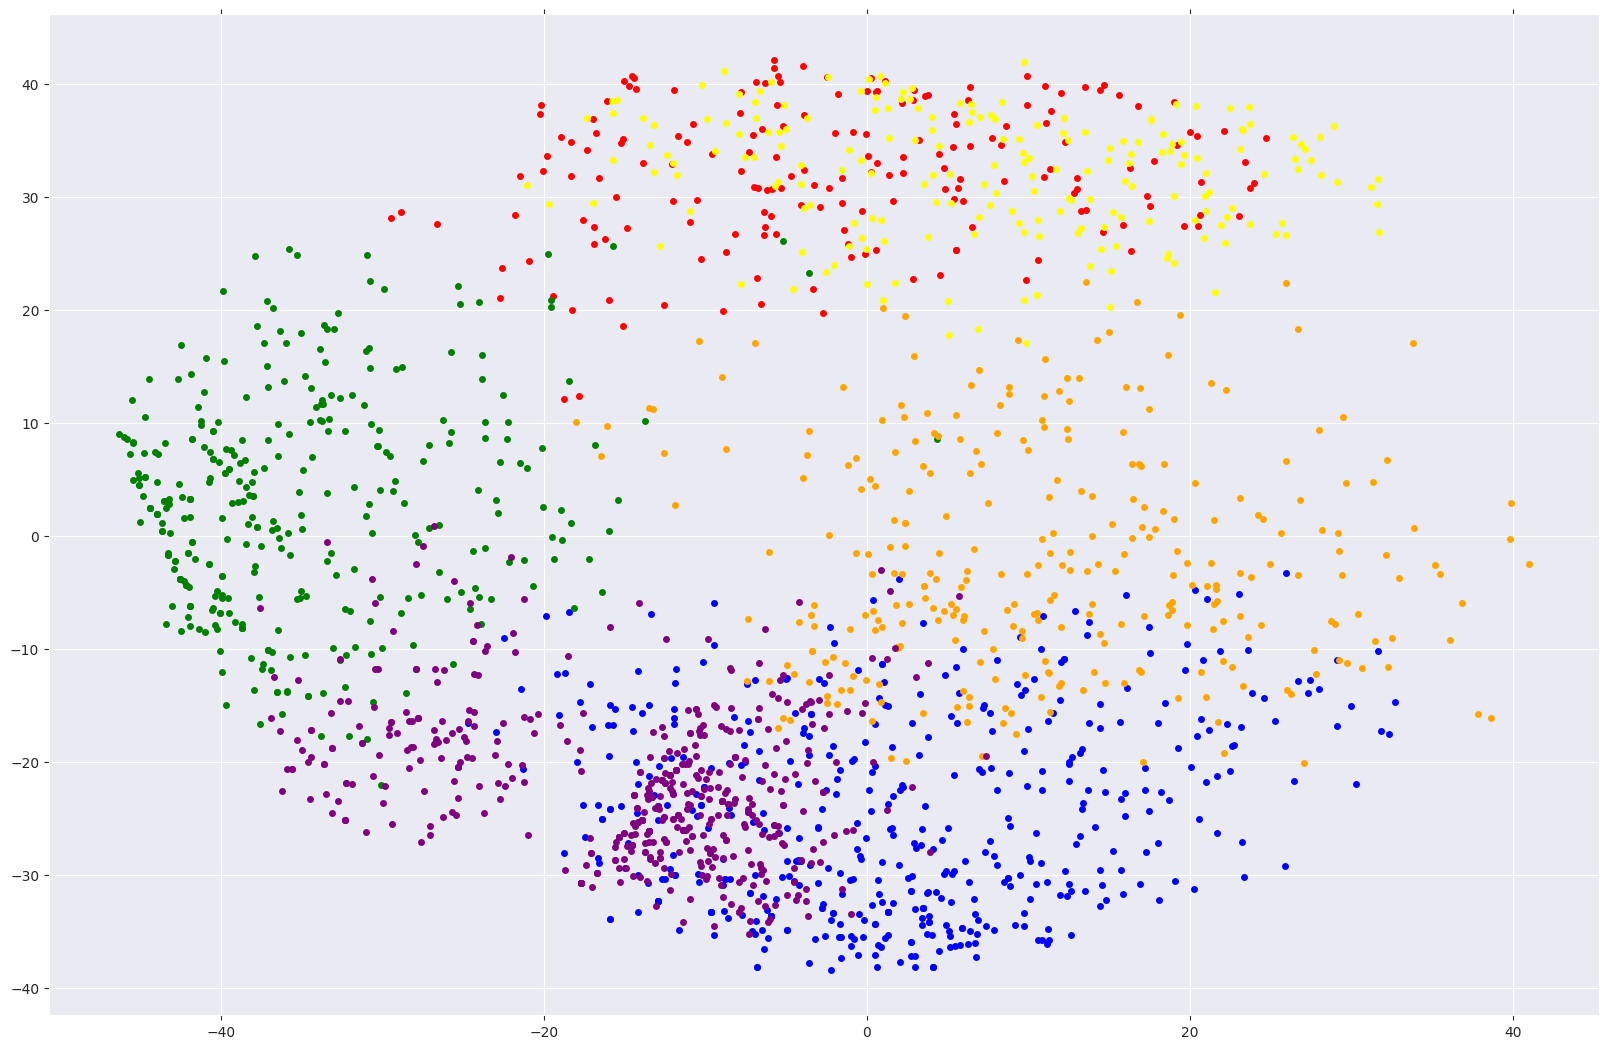

In [39]:
x, y = X_PCA[:, 0], X_PCA[:, 1]
colors = {0: 'red',
          1: 'blue',
          2: 'green',
          3: 'yellow',
          4: 'orange',
          5:'purple'}
names = {0: 'who make all type of purchases',
         1: 'more people with due payments',
         2: 'who purchases mostly in installments',
         3: 'who take more cash in advance',
         4: 'who make expensive purchases',
         5:'who don\'t spend much money'}

df = pd.DataFrame({'x': x, 'y':y, 'label':labels})
groups = df.groupby('label')


fig, ax = plt.subplots(figsize=(20, 13))

for name, group in groups:
   ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
           color=colors[name],label=names[name], mec='none')
   ax.set_aspect('auto')
   ax.tick_params(axis='x',which='both',
                  bottom='off',top='off',labelbottom='off')
   ax.tick_params(axis= 'y',which='both',
                  left='off',top='off',labelleft='off')

ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

In [40]:
#Задание 2 – Исследование частотных характеристик
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import seaborn
seaborn.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
%matplotlib inline

In [41]:
industries = pdr.get_data_famafrench(
 "10_Industry_Portfolios", start="1-1-1926")[0]

In [43]:
scaler = StandardScaler()
normalized_industries = pd.DataFrame(
 scaler.fit_transform(industries),
 columns=industries.columns,
 index=industries.index,
)
normalized_industries.head()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
1926-07,0.108037,1.771288,0.591489,-0.345918,0.245421,0.002410,-0.157551,0.126671,1.128563,0.190668
1926-08,0.658413,0.309416,0.288903,0.378791,0.211985,0.290731,-0.298872,0.576004,-0.467053,0.537899
1926-09,0.040332,0.447352,0.021727,-0.690350,-0.211533,0.342370,-0.140317,-0.069006,0.214694,-0.097127
1926-10,-0.479468,-1.157382,-0.747613,-0.283578,-0.796657,-0.199845,-0.571172,-0.297297,-0.638861,-0.586692
1926-11,0.927049,-0.167201,0.496528,-0.160455,0.497581,0.174542,0.931650,0.787988,0.519926,0.187540


In [44]:
dt = 1 # sampling interval
Fs = 1 / dt # sampling frequency
t = np.arange(0, normalized_industries.shape[0], dt)
s = normalized_industries["HiTec"].values

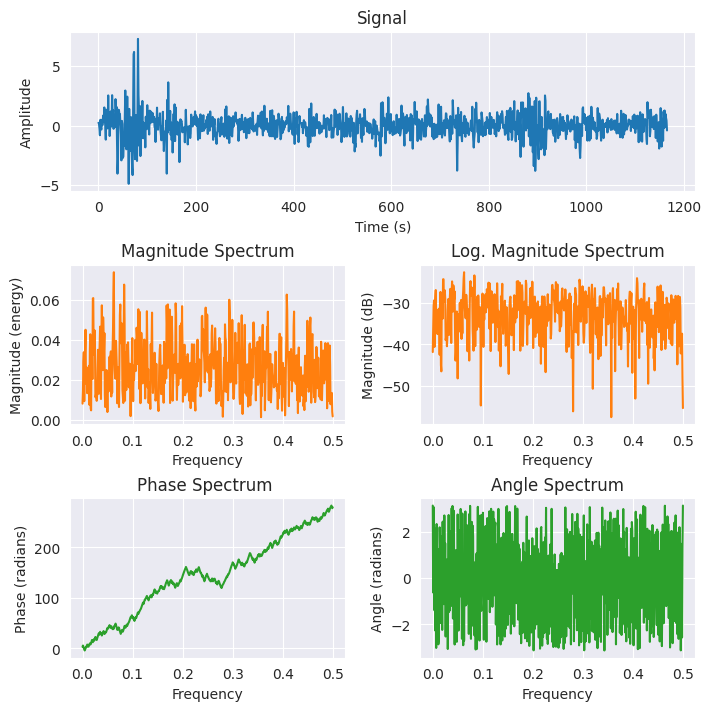

In [45]:
fig = plt.figure(figsize=(7, 7), layout='constrained')
axs = fig.subplot_mosaic([["signal", "signal"],
 ["magnitude", "log_magnitude"],
 ["phase", "angle"]])
# plot time signal:
axs["signal"].set_title("Signal")
axs["signal"].plot(t, s, color='C0')
axs["signal"].set_xlabel("Time (s)")
axs["signal"].set_ylabel("Amplitude")
# plot different spectrum types:
axs["magnitude"].set_title("Magnitude Spectrum")
axs["magnitude"].magnitude_spectrum(s, Fs=Fs, color='C1')
axs["log_magnitude"].set_title("Log. Magnitude Spectrum")
axs["log_magnitude"].magnitude_spectrum(
 s, Fs=Fs, scale='dB', color='C1')
axs["phase"].set_title("Phase Spectrum ")
axs["phase"].phase_spectrum(s, Fs=Fs, color='C2')
axs["angle"].set_title("Angle Spectrum")
axs["angle"].angle_spectrum(s, Fs=Fs, color='C2')
plt.show()

In [46]:
from scipy.fft import fft, fftfreq
# Number of samples in normalized_tone
N = normalized_industries.shape[0]
SAMPLE_RATE = 44100 # Hertz
yf = fft(normalized_industries)
xf = fftfreq(N, 1 / SAMPLE_RATE)
fft_industries = pd.DataFrame(
 np.abs(yf),
 columns=normalized_industries.columns,
 index=xf)


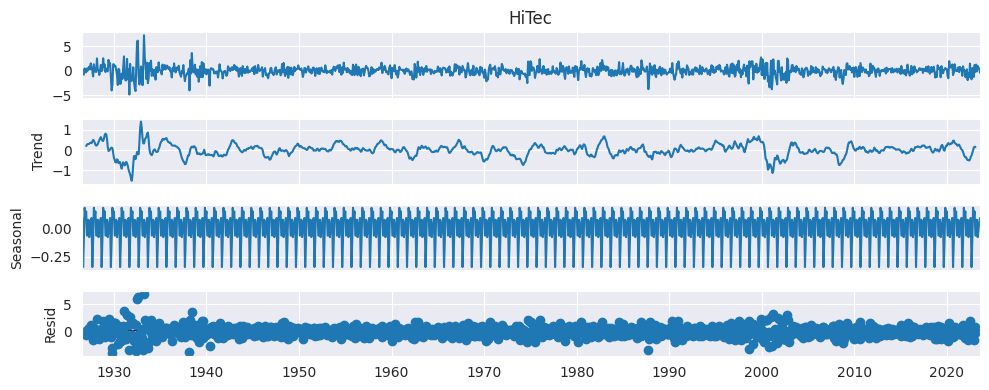

In [47]:
#Задание 3 – Декомпозиция временного ряда
import statsmodels.api as sm
decompose = normalized_industries.copy()
decompose.index = decompose.index.to_timestamp()
nresult = sm.tsa.seasonal_decompose(
 decompose.HiTec)
plt.rcParams["figure.figsize"] = (10, 4)
nresult.plot()
plt.show()

In [48]:
decompose['Data'] = pd.PeriodIndex(
 decompose.index.map(
 lambda x: "{0}{1:02d}".format(x.year, x.month)), freq="M")
decompose.set_index('Data')

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Data,,,,,,,,,,
1926-07,0.108037,1.771288,0.591489,-0.345918,0.245421,0.002410,-0.157551,0.126671,1.128563,0.190668
1926-08,0.658413,0.309416,0.288903,0.378791,0.211985,0.290731,-0.298872,0.576004,-0.467053,0.537899
1926-09,0.040332,0.447352,0.021727,-0.690350,-0.211533,0.342370,-0.140317,-0.069006,0.214694,-0.097127
1926-10,-0.479468,-1.157382,-0.747613,-0.283578,-0.796657,-0.199845,-0.571172,-0.297297,-0.638861,-0.586692
1926-11,0.927049,-0.167201,0.496528,-0.160455,0.497581,0.174542,0.931650,0.787988,0.519926,0.187540
...,...,...,...,...,...,...,...,...,...,...
2023-04,0.481506,-2.020711,-0.256716,0.241642,-0.122372,0.036836,0.200920,0.552450,0.156206,0.143745
2023-05,-1.377106,1.521280,-1.055027,-1.644161,0.987971,-2.198727,-0.069657,-0.858963,-1.221910,-0.556974
2023-06,0.411617,2.893247,1.557187,0.838553,0.664760,0.820036,1.183270,0.650289,0.318875,1.021207


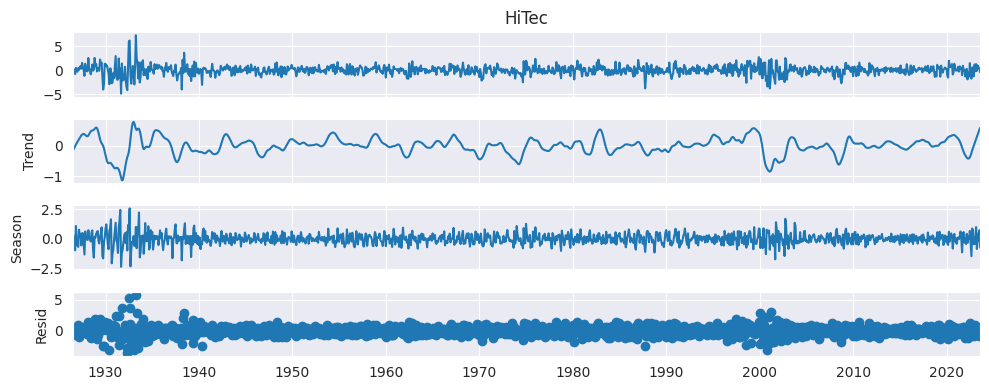

In [49]:
from statsmodels.tsa import seasonal
nresult = seasonal.STL(
 decompose.HiTec).fit()
plt.rcParams["figure.figsize"] = (10, 4)
nresult.plot()
plt.show()

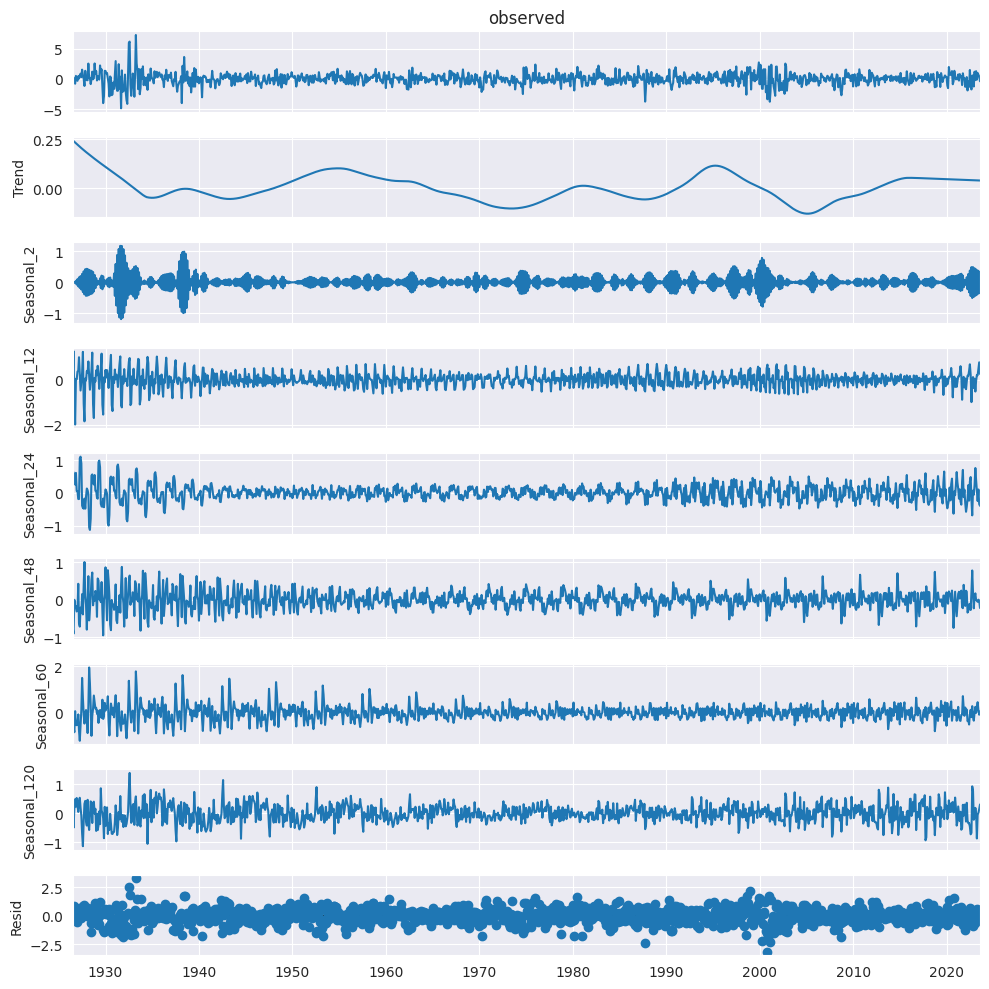

In [50]:
from statsmodels.tsa import seasonal
nresult = seasonal.MSTL(
 decompose.HiTec,
 periods=(2, 12, 24, 48, 60, 120)).fit()
plt.rcParams["figure.figsize"] = (10, 10)
nresult.plot()
plt.tight_layout()
plt.show()

In [52]:
#Задание 4 – Выделение кластеров
mall_customers = pd.read_csv("Mall_Customers.csv")
mall_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


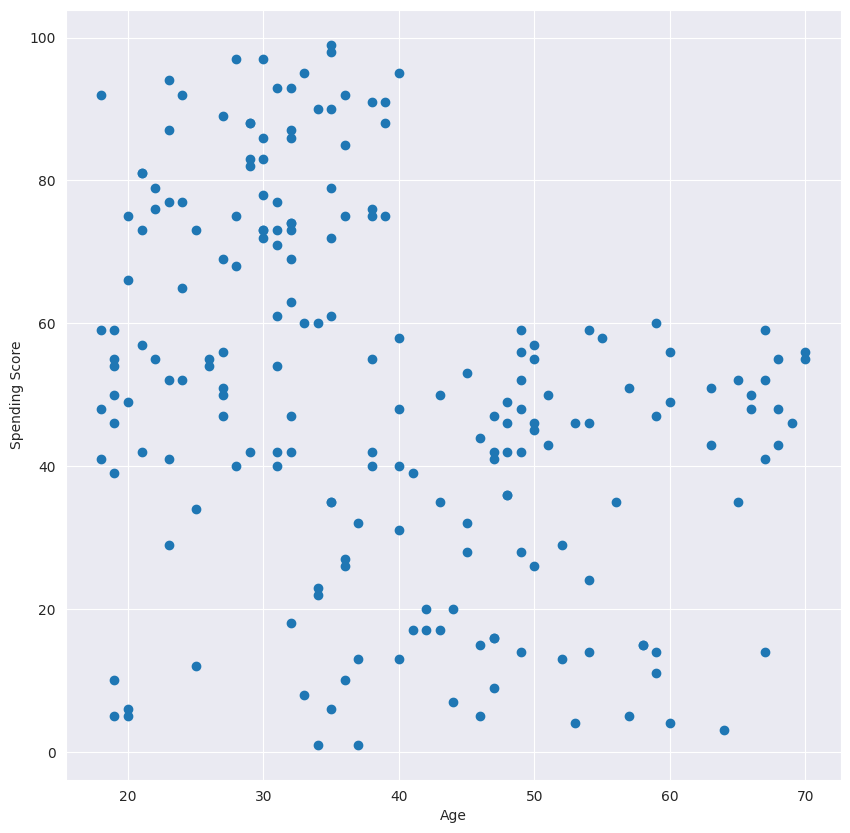

In [53]:
plt.scatter(
 mall_customers['Age'],
 mall_customers['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

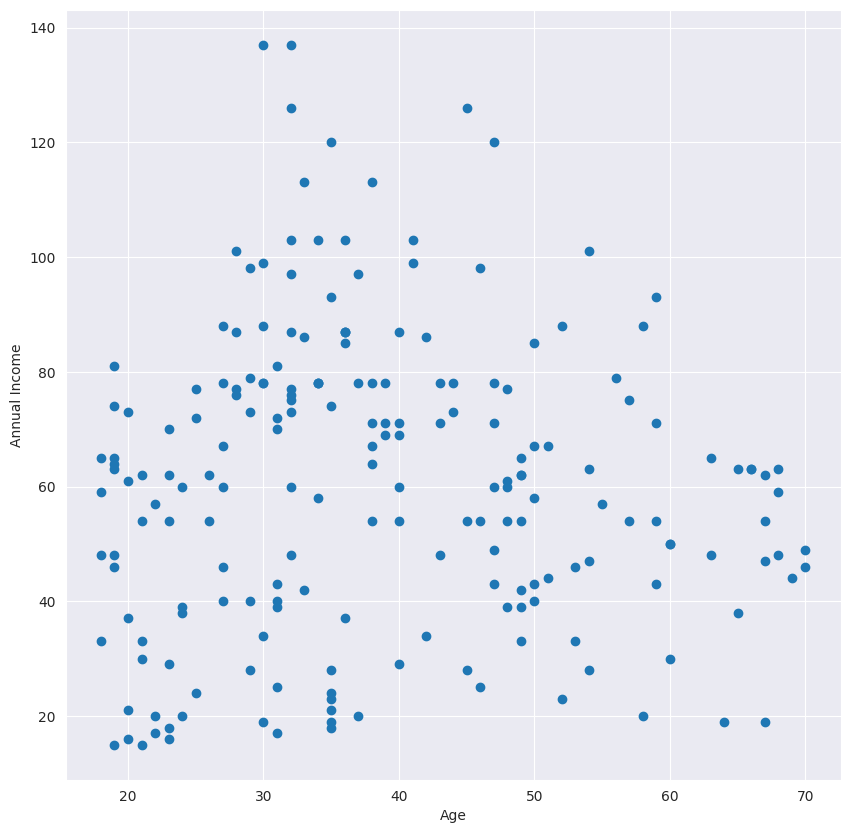

In [54]:
plt.scatter(
 mall_customers['Age'], mall_customers['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

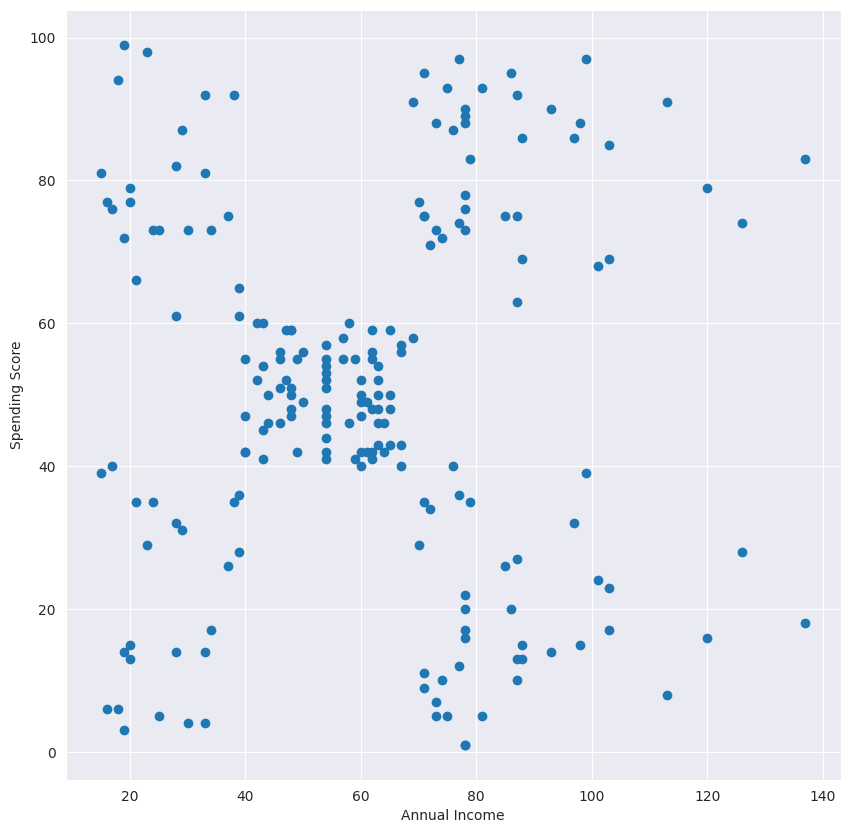

In [55]:
plt.scatter(
 mall_customers['Annual Income (k$)'],
 mall_customers['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [56]:
from sklearn.cluster import KMeans


In [57]:
sse = []
for i in range(1, 10):
 km = KMeans(n_clusters = i)
 km.fit(mall_customers[
 ['Annual Income (k$)', 'Spending Score (1-100)']])
 sse.append(km.inertia_)
sse


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37271.88623658949,
 31600.209115340014,
 25028.020475269415,
 21826.93630323166]

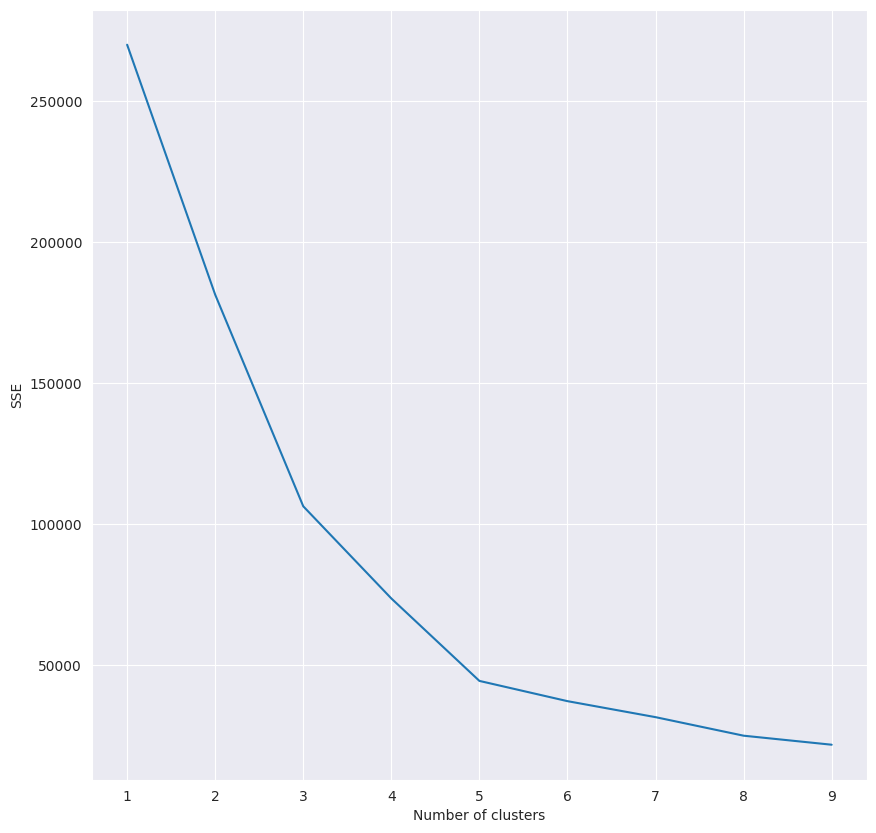

In [59]:
plt.xlabel('Number of clusters')
plt.ylabel("SSE")
plt.plot(range(1,10), sse)


In [58]:
km = KMeans(n_clusters = 5)
predicted = km.fit_predict(
 mall_customers[['Annual Income (k$)',
 'Spending Score (1-100)']])
predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2,
       1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 2, 0, 3, 0, 3, 0,
       2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

In [60]:
mall_customers['Cluster'] = predicted
mall_customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,4
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,3
197,198,Male,32,126,74,0
198,199,Male,32,137,18,3


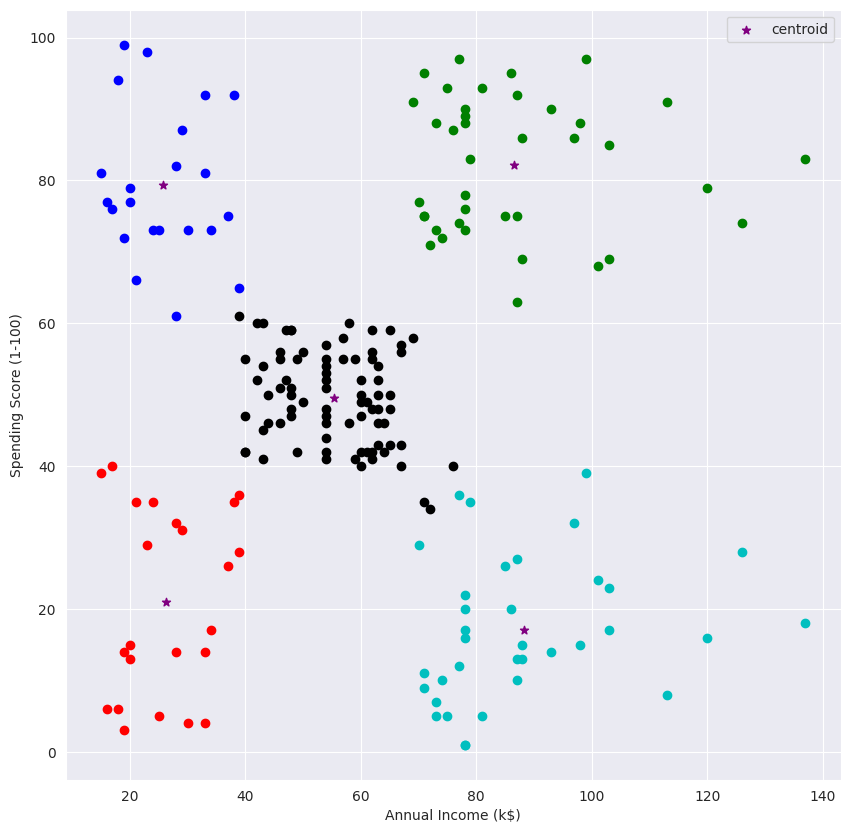

In [61]:
df1 = mall_customers[mall_customers.Cluster==0]
df2 = mall_customers[mall_customers.Cluster==1]
df3 = mall_customers[mall_customers.Cluster==2]
df4 = mall_customers[mall_customers.Cluster==3]
df5 = mall_customers[mall_customers.Cluster==4]
plt.scatter(df1['Annual Income (k$)'],
 df1['Spending Score (1-100)'],color='green')
plt.scatter(df2['Annual Income (k$)'],
 df2['Spending Score (1-100)'],color='red')
plt.scatter(df3['Annual Income (k$)'],
 df3['Spending Score (1-100)'],color='black')
plt.scatter(df4['Annual Income (k$)'],
 df4['Spending Score (1-100)'],color='c')
plt.scatter(df5['Annual Income (k$)'],
 df5['Spending Score (1-100)'],color='blue')
plt.scatter(
 km.cluster_centers_[:,0],
 km.cluster_centers_[:,1],
 color='purple',marker='*',label='centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()


In [62]:
#Задание 5 – Анализ вариации
import pandas as pd
import numpy as np
pd.set_option("display.width", 100)
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader as pdr
import seaborn as sns
seaborn.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
%matplotlib inline

In [65]:
try:
   industries = pd.read_csv("data/10_Industry_Portfolios.csv")
except:
   industries = pdr.get_data_famafrench(
       "10_Industry_Portfolios", start="1-1-1926")[0]
   industries.to_csv("10_Industry_Portfolios.csv")

industries.head()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
1926-07,1.45,15.55,4.69,-1.18,2.90,0.83,0.11,1.77,7.04,2.13
1926-08,3.97,3.68,2.81,3.47,2.66,2.17,-0.71,4.25,-1.69,4.35
1926-09,1.14,4.80,1.15,-3.39,-0.38,2.41,0.21,0.69,2.04,0.29
1926-10,-1.24,-8.23,-3.63,-0.78,-4.58,-0.11,-2.29,-0.57,-2.63,-2.84
1926-11,5.20,-0.19,4.10,0.01,4.71,1.63,6.43,5.42,3.71,2.11


In [67]:
try:
 factors = pd.read_csv("F-F_Research_Data_Factors.csv")
except:
 factors = pdr.get_data_famafrench(
 "F-F_Research_Data_Factors", start="1-1-1926")[0]
 factors.to_csv("F-F_Research_Data_Factors.csv")
factors.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.56,-2.43,0.22
1926-08,2.64,-1.17,3.82,0.25
1926-09,0.36,-1.40,0.13,0.23
1926-10,-3.24,-0.09,0.70,0.32
1926-11,2.53,-0.10,-0.51,0.31


In [69]:
endog = industries.HiTec - factors.RF.values
exog = sm.add_constant(factors["Mkt-RF"])
rols = RollingOLS(endog, exog, window=60)
rres = rols.fit()
params = rres.params.copy()
params.index = np.arange(1, params.shape[0] + 1)

params.tail()

,const,Mkt-RF
1162,0.431788,1.099213
1163,0.498210,1.094085
1164,0.496020,1.087648
1165,0.519929,1.089495
1166,0.476109,1.085737


In [70]:
new_columns = list(industries.columns)
new_columns[7] = 'Hlth'
industries = industries.set_axis(new_columns, axis=1)
new_columns = list(factors.columns)
new_columns[0] = 'Mkt_RF'
factors = factors.set_axis(new_columns, axis=1)

In [71]:
study_df = pd.concat([factors, industries], axis=1)

In [73]:
resampled_df = study_df.resample('40Q', convention='start').mean()

In [74]:
df_melt = pd.melt(
 resampled_df.reset_index(),
 id_vars=['Mkt_RF'],
 value_vars=['NoDur', 'Durbl', 'Manuf',
 'Enrgy', 'HiTec', 'Telcm',
 'Shops', 'Hlth', 'Utils',
 'Other'])
df_melt.columns = ['Mkt_RF', 'Industry', 'value']
df_melt.head()


,Mkt_RF,Industry,value
0,0.716167,NoDur,0.808083
1,0.911500,NoDur,0.896833
2,1.099500,NoDur,0.520667
3,0.616500,NoDur,1.105667
4,0.079417,NoDur,0.636083


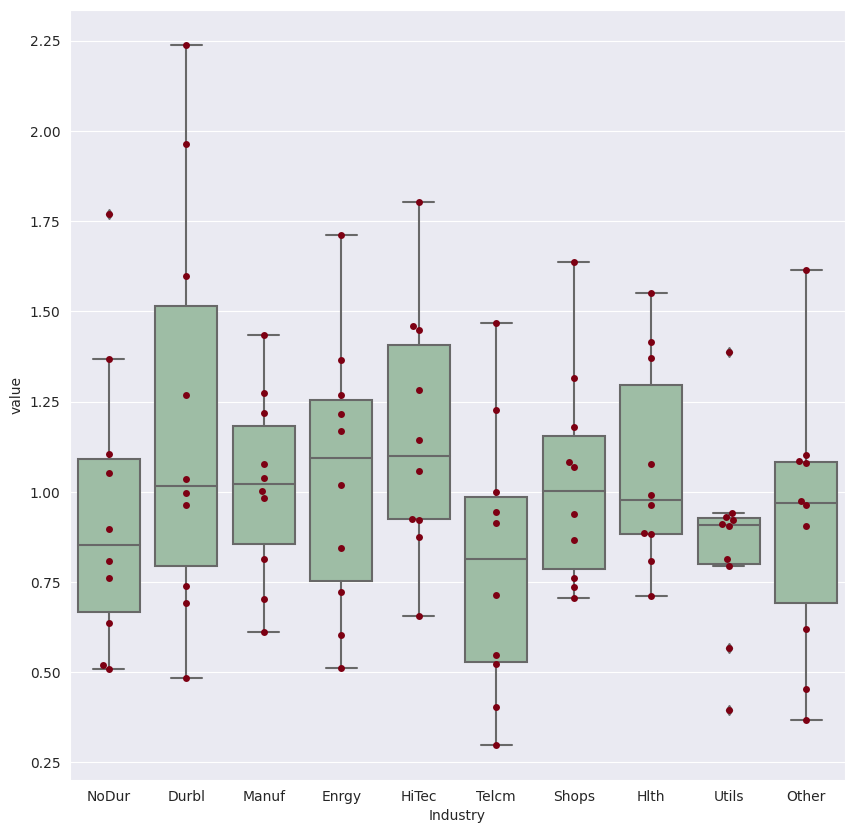

In [75]:
ax = sns.boxplot(
 x='Industry', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(
 x="Industry", y="value", data=df_melt, color='#7d0013')
plt.show()

In [76]:
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(
 resampled_df['NoDur'],
 resampled_df['Durbl'],
 resampled_df['Manuf'],
 resampled_df['Enrgy'],
 resampled_df['HiTec'],
 resampled_df['Telcm'],
 resampled_df['Shops'],
 resampled_df['Hlth'],
 resampled_df['Utils'],
 resampled_df['Other'])
print(fvalue, pvalue)

1.187125425591995 0.3129528266417173


In [77]:
model = ols('value ~ C(Industry)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Industry),1.402048,9.0,1.187125,0.312953
Residual,11.810441,90.0,NaN,NaN


In [78]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
hsd = pairwise_tukeyhsd(
 df_melt.value,
 df_melt.Industry,
 alpha=0.05)
hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Durbl,Enrgy,-0.1548,0.994,-0.6804,0.3709,False
Durbl,HiTec,-0.0407,1.0,-0.5664,0.4849,False
Durbl,Hlth,-0.1325,0.9981,-0.6581,0.3932,False
Durbl,Manuf,-0.1823,0.9808,-0.7079,0.3433,False
Durbl,NoDur,-0.2553,0.8562,-0.7809,0.2703,False
Durbl,Other,-0.2816,0.7707,-0.8072,0.244,False
Durbl,Shops,-0.1694,0.9884,-0.695,0.3562,False
Durbl,Telcm,-0.3939,0.3203,-0.9195,0.1317,False
Durbl,Utils,-0.3411,0.5286,-0.8667,0.1845,False
Enrgy,HiTec,0.114,0.9994,-0.4116,0.6396,False


In [79]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9753215909004211 0.057177163660526276


In [80]:
import scipy.stats as stats
w, pvalue = stats.bartlett(
 resampled_df['NoDur'],
 resampled_df['Durbl'],
 resampled_df['Manuf'],
 resampled_df['Enrgy'],
 resampled_df['HiTec'],
 resampled_df['Telcm'],
 resampled_df['Shops'],
 resampled_df['Hlth'],
 resampled_df['Utils'],
 resampled_df['Other'])
print(w, pvalue)

9.991866878209393 0.35114403783044945


In [81]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.187
Date:                Sat, 04 Nov 2023   Prob (F-statistic):              0.313
Time:                        19:00:11   Log-Likelihood:                -35.085
No. Observations:                 100   AIC:                             90.17
Df Residuals:                      90   BIC:                             116.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1980      0.115     10.458      0.000       0.970       1.426
C(Industry)[T.Enrgy]    -0.1548      0.162     -0.955      0.342      -0.477       0.167
C(Industry)[T.HiTec]    -0.0407      0.162     -0.251      0.802      -0.363       0.281
C(Industry)[T.Hlth]     -0.1325      0.162     -0.818      0.416      -0.454       0.189
C(Industry)[T.Manuf]    -0.1823      0.162     -1.125      0.263      -0.504       0.140
C(Industry)[T.NoDur]    -0.2553      0.162     -1.576      0.119      -0.577       0.067
C(Industry)[T.Other]    -0.2816      0.162     -1.738      0.086      -0.603       0.040
C(Industry)[T.Shops]    -0.1694      0.162     -1.046      0.299      -0.491       0.152
C(Industry)[T.Telcm]    -0.3939      0.162     -2.431      0.017      -0.716      -0.072
C(Industry)[T.Utils]    -0.3411      0.162     -2.105      0.038      -0.663      -0.019
==============================================================================
Omnibus:                        5.331   Durbin-Watson:                   2.397
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                5.032
Skew:                           0.548   Prob(JB):                       0.0808
Kurtosis:                       3.080   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""